# Lockman SWIRE master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
44f1ae0 (Thu Nov 30 18:27:54 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import (nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix,
                                              quick_checks)

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20170710"

master_catalogue_filename = "master_catalogue_lockman-swire_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_lockman-swire_20171201.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(168, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(168, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

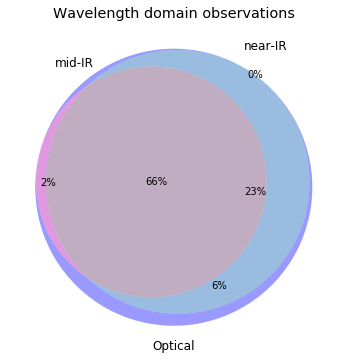

In [6]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

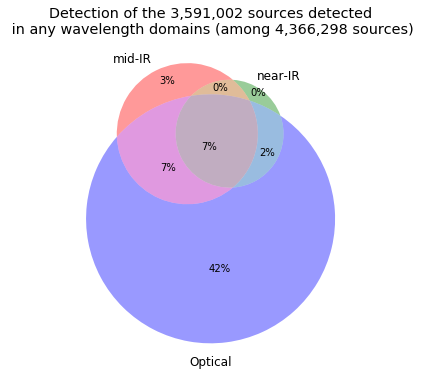

In [7]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = ["WFC u", "Megacam u"]
g_bands = ["WFC g", "Megacam g",  "GPC1 g"]
r_bands = ["WFC r", "Megacam r",  "GPC1 r"]
i_bands = ["WFC i", "Megacam i",  "GPC1 i"]
z_bands = ["WFC z", "Megacam z",  "GPC1 z"]
y_bands = [         "Megacam y",  "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

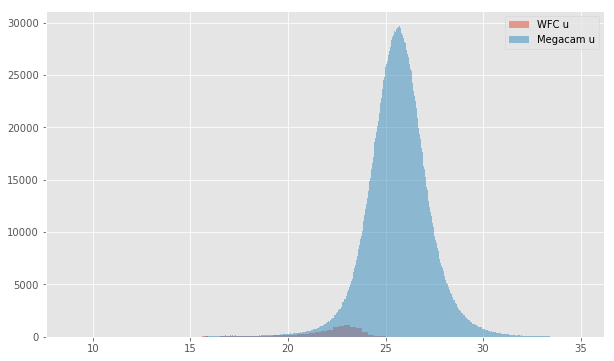

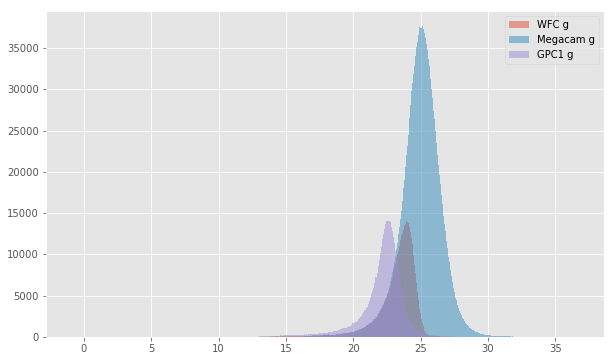

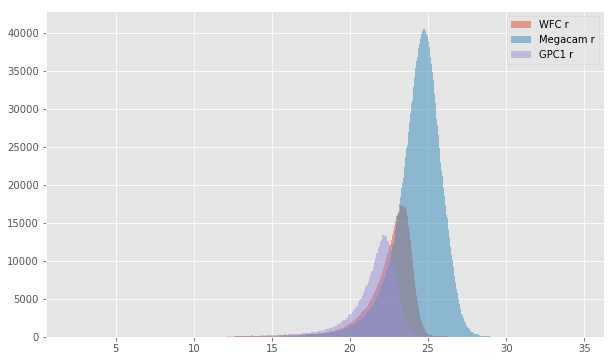

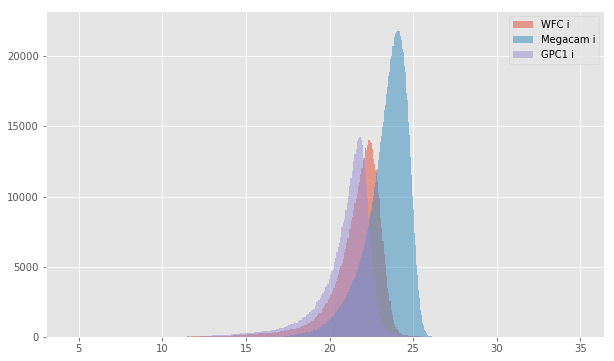

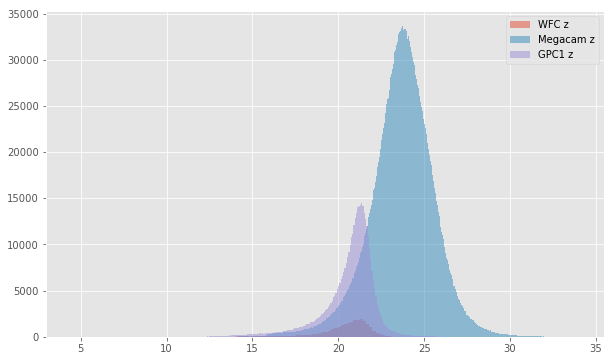

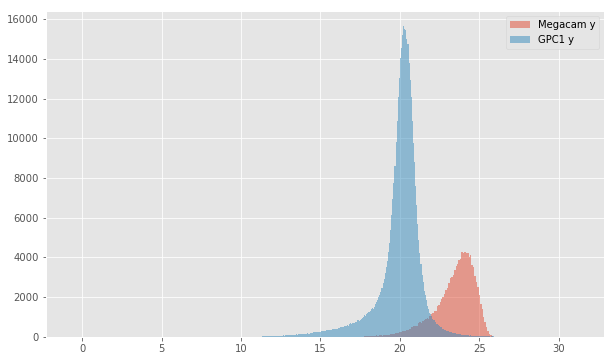

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

Megacam u (aperture) - WFC u (aperture):
- Median: -0.06
- Median Absolute Deviation: 0.25
- 1% percentile: -0.9491949844360351
- 99% percentile: 3.2663552665710673


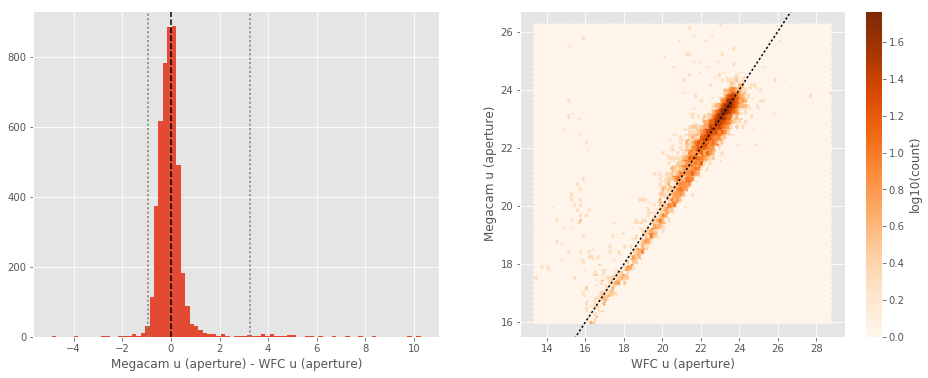

Megacam u (total) - WFC u (total):
- Median: -0.27
- Median Absolute Deviation: 0.21
- 1% percentile: -1.6218692207336425
- 99% percentile: 2.0539311504363935


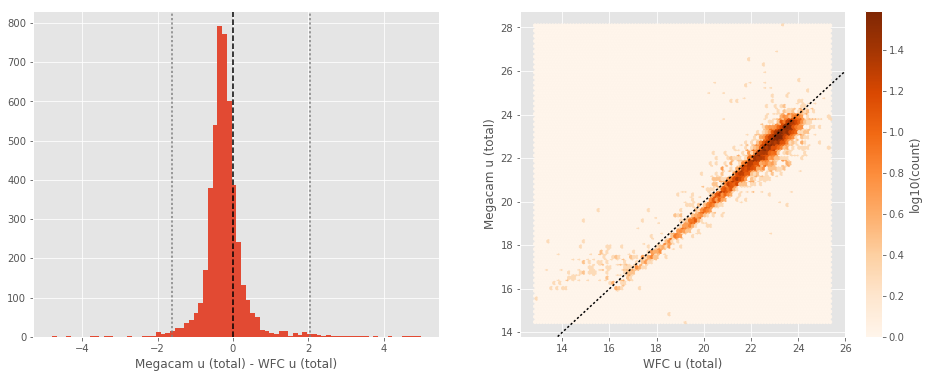

Megacam g (aperture) - WFC g (aperture):
- Median: 0.11
- Median Absolute Deviation: 0.14
- 1% percentile: -0.5078629302978516
- 99% percentile: 0.8724484062194824


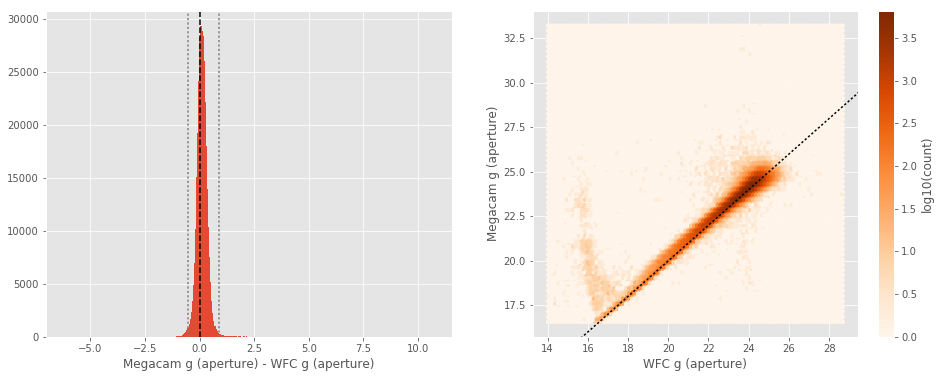

Megacam g (total) - WFC g (total):
- Median: -0.05
- Median Absolute Deviation: 0.15
- 1% percentile: -0.9023867797851562
- 99% percentile: 1.4200260162353513


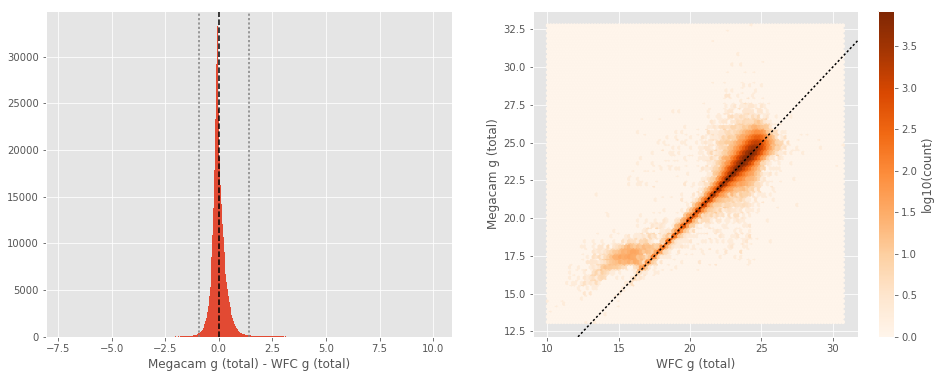

GPC1 g (aperture) - WFC g (aperture):
- Median: -0.14
- Median Absolute Deviation: 0.27
- 1% percentile: -2.033579864501953
- 99% percentile: 2.2427005767822266


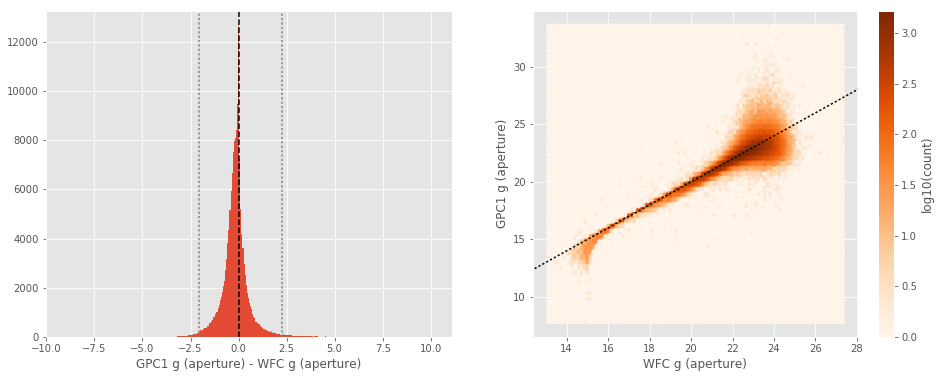

GPC1 g (total) - WFC g (total):
- Median: -0.03
- Median Absolute Deviation: 0.24
- 1% percentile: -2.5378850173950194
- 99% percentile: 1.7712992477417002


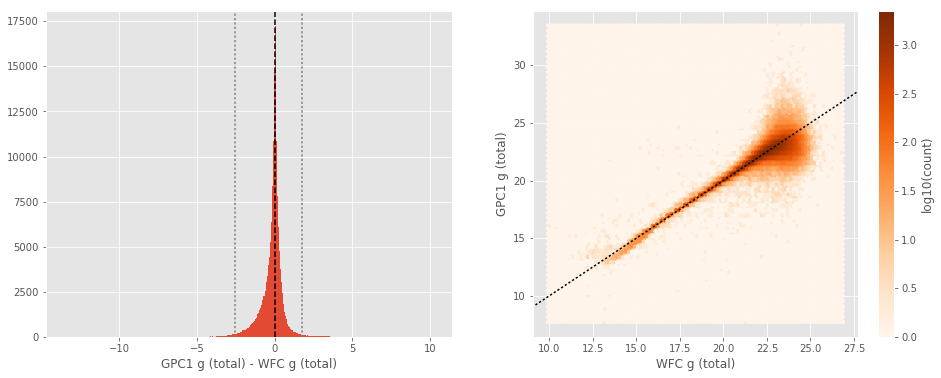

GPC1 g (aperture) - Megacam g (aperture):
- Median: -0.33
- Median Absolute Deviation: 0.38
- 1% percentile: -2.9429248237609866
- 99% percentile: 2.1852089309692397


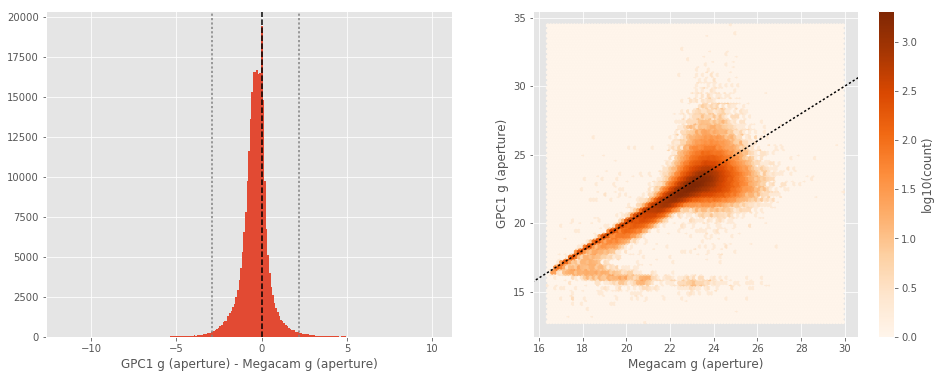

GPC1 g (total) - Megacam g (total):
- Median: 0.02
- Median Absolute Deviation: 0.28
- 1% percentile: -3.185884475708008
- 99% percentile: 1.8667194366455089


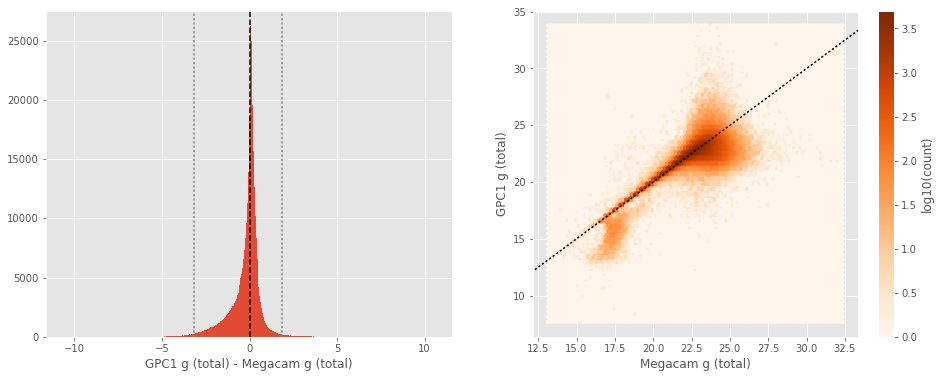

Megacam r (aperture) - WFC r (aperture):
- Median: 0.13
- Median Absolute Deviation: 0.15
- 1% percentile: -0.545387954711914
- 99% percentile: 1.148755531311045


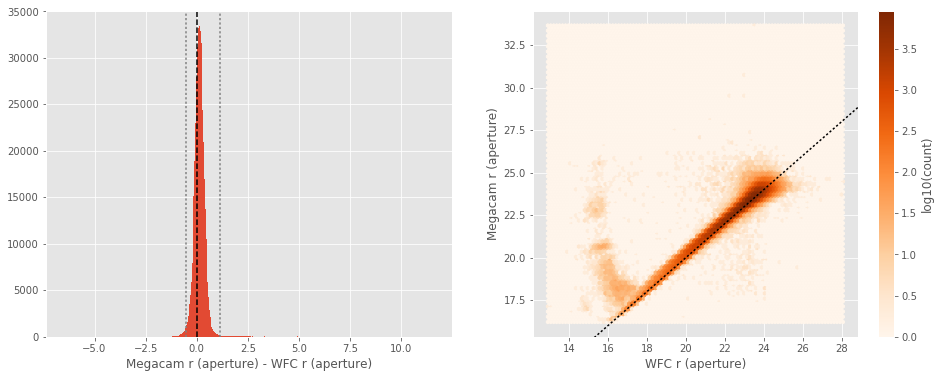

Megacam r (total) - WFC r (total):
- Median: -0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -0.9950507736206055
- 99% percentile: 1.6092028617858827


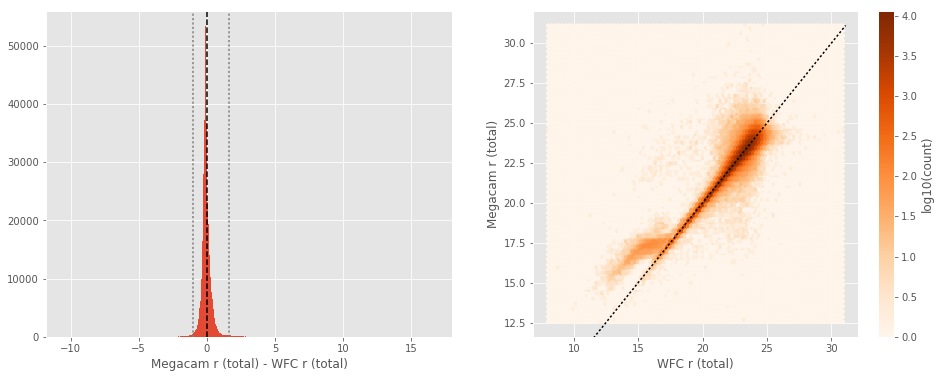

GPC1 r (aperture) - WFC r (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.15
- 1% percentile: -1.2963315582275392
- 99% percentile: 1.1390761566162118


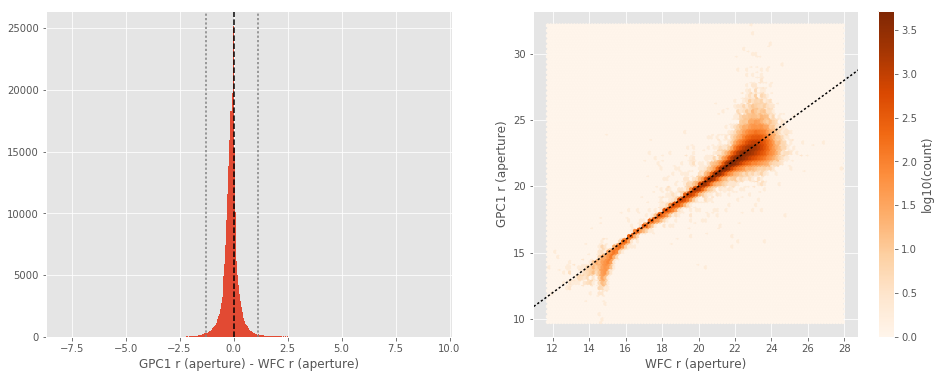

GPC1 r (total) - WFC r (total):
- Median: -0.01
- Median Absolute Deviation: 0.14
- 1% percentile: -1.7165836334228515
- 99% percentile: 0.9766998291015625


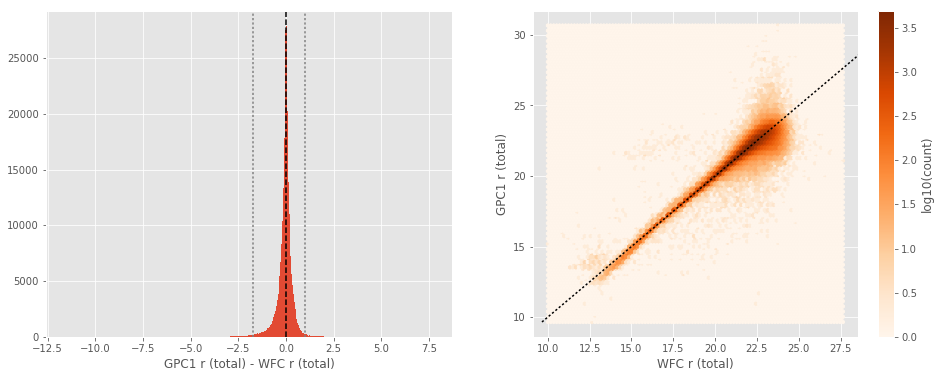

GPC1 r (aperture) - Megacam r (aperture):
- Median: -0.26
- Median Absolute Deviation: 0.25
- 1% percentile: -2.3193286895751952
- 99% percentile: 1.125625000000003


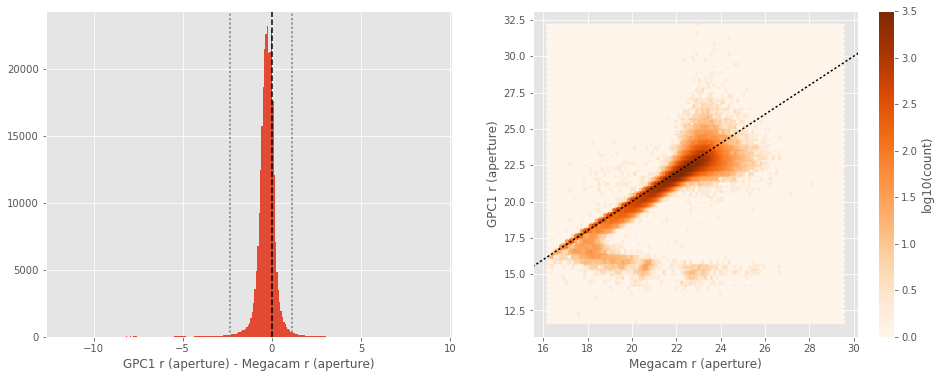

GPC1 r (total) - Megacam r (total):
- Median: 0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -2.285899467468262
- 99% percentile: 1.0307445526123051


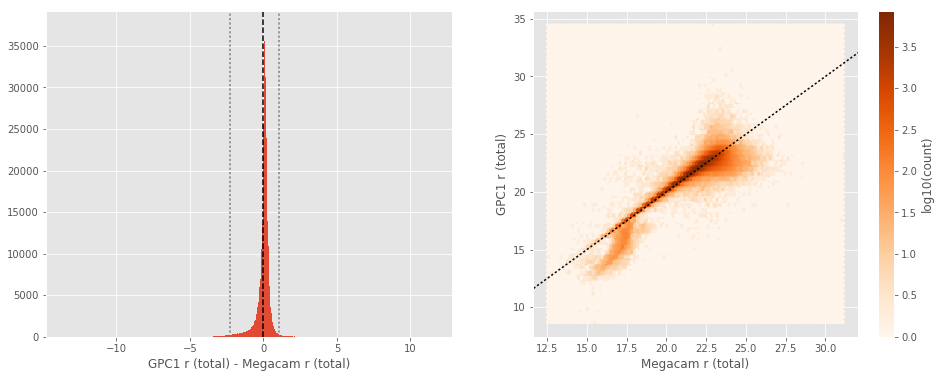

Megacam i (total) - WFC i (total):
- Median: -0.08
- Median Absolute Deviation: 0.20
- 1% percentile: -0.9779530334472656
- 99% percentile: 1.4092513275146472


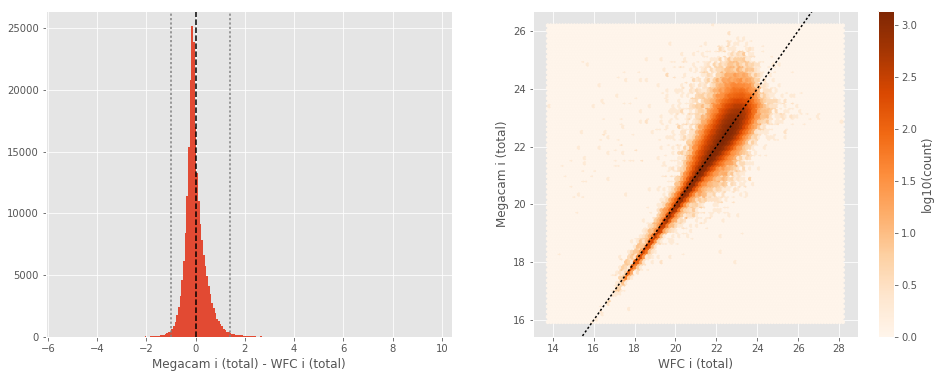

GPC1 i (aperture) - WFC i (aperture):
- Median: -0.03
- Median Absolute Deviation: 0.14
- 1% percentile: -1.025598430633545
- 99% percentile: 0.9575976371765118


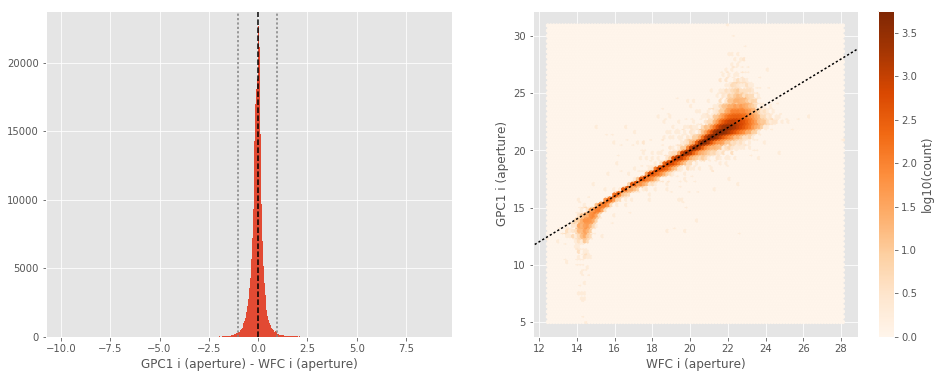

GPC1 i (total) - WFC i (total):
- Median: 0.06
- Median Absolute Deviation: 0.15
- 1% percentile: -1.102666082382202
- 99% percentile: 0.9996103668212877


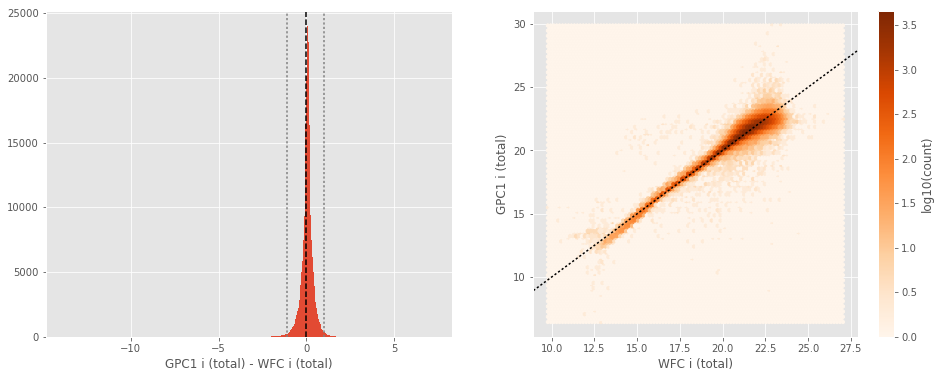

GPC1 i (total) - Megacam i (total):
- Median: 0.17
- Median Absolute Deviation: 0.12
- 1% percentile: -1.6147754669189454
- 99% percentile: 0.8306443786621096


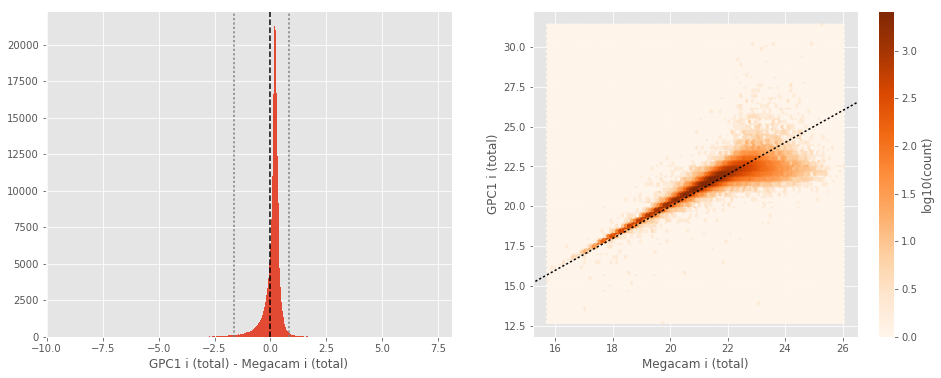

Megacam z (aperture) - WFC z (aperture):
- Median: 0.14
- Median Absolute Deviation: 0.17
- 1% percentile: -0.6397380828857422
- 99% percentile: 3.043675384521484


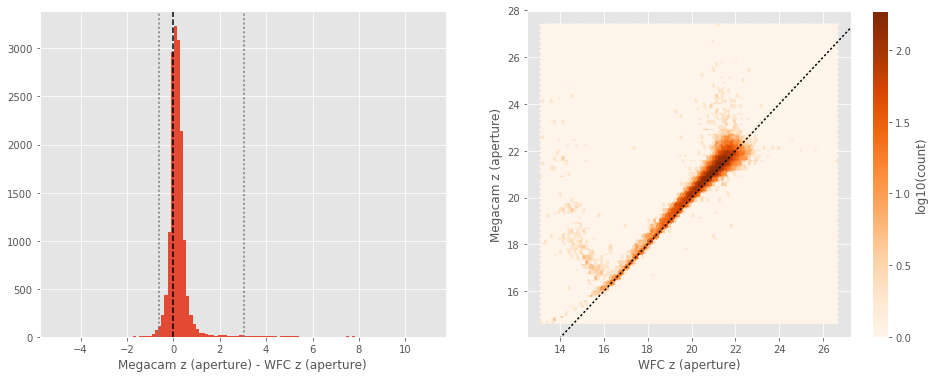

Megacam z (total) - WFC z (total):
- Median: -0.04
- Median Absolute Deviation: 0.22
- 1% percentile: -0.9952455520629883
- 99% percentile: 2.1356584072113094


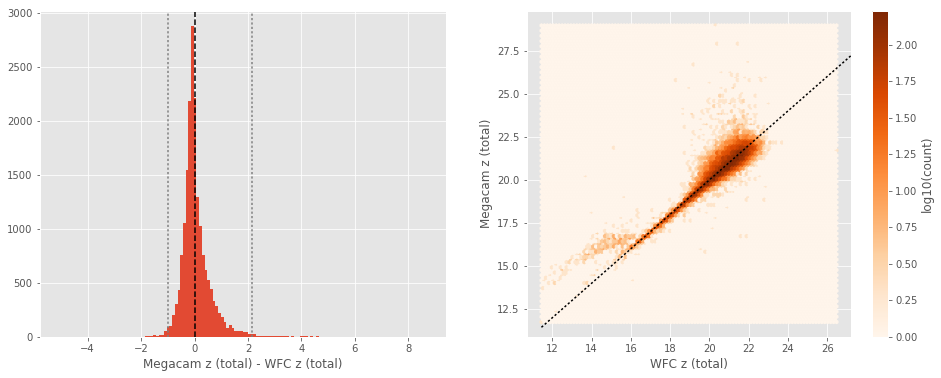

GPC1 z (aperture) - WFC z (aperture):
- Median: 0.01
- Median Absolute Deviation: 0.15
- 1% percentile: -0.9230419921874999
- 99% percentile: 1.1071548843383785


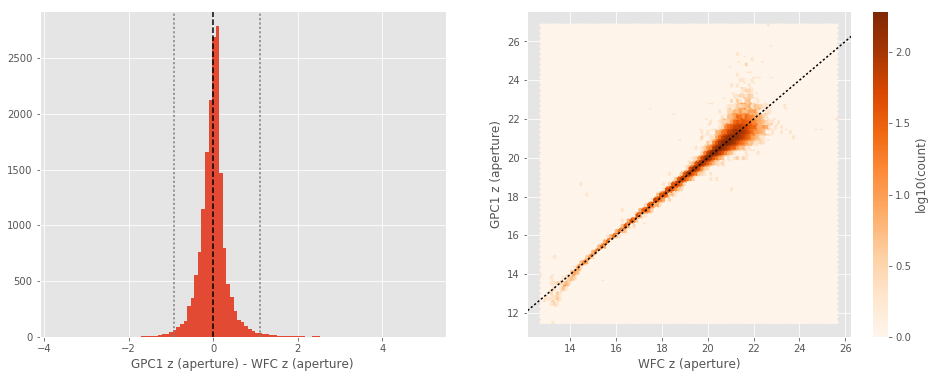

GPC1 z (total) - WFC z (total):
- Median: 0.09
- Median Absolute Deviation: 0.19
- 1% percentile: -0.9829817771911621
- 99% percentile: 1.4533742713928244


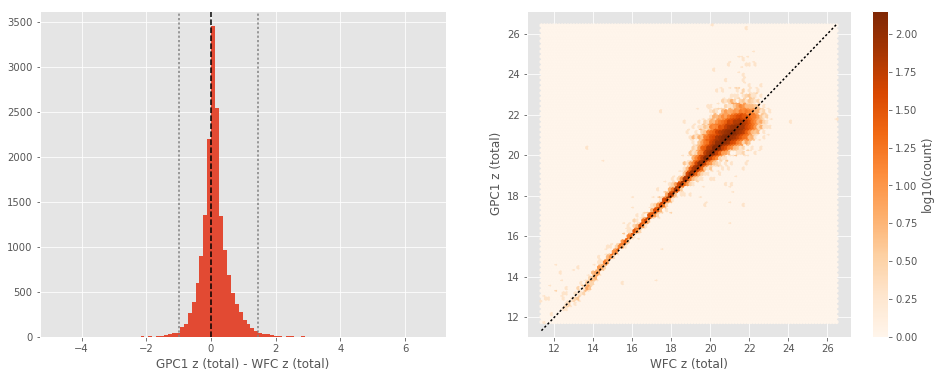

GPC1 z (aperture) - Megacam z (aperture):
- Median: -0.22
- Median Absolute Deviation: 0.26
- 1% percentile: -2.777841310501098
- 99% percentile: 1.4052535629272451


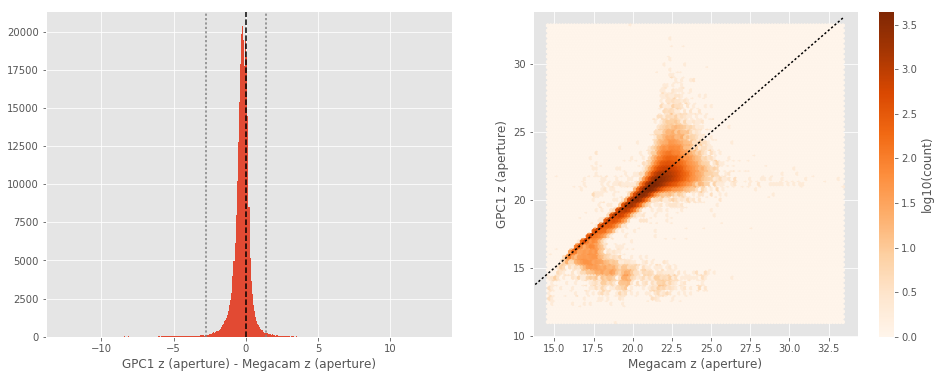

GPC1 z (total) - Megacam z (total):
- Median: 0.13
- Median Absolute Deviation: 0.17
- 1% percentile: -2.225839080810547
- 99% percentile: 1.3188536834716849


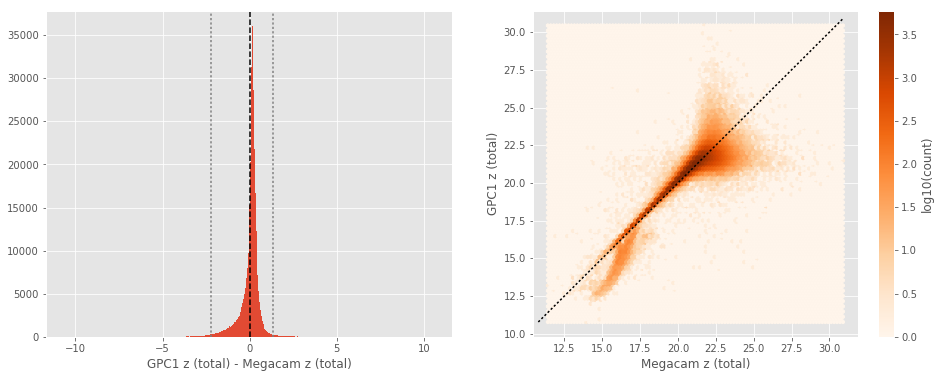

GPC1 y (total) - Megacam y (total):
- Median: -0.57
- Median Absolute Deviation: 0.41
- 1% percentile: -3.220444412231445
- 99% percentile: 1.1729692840576167


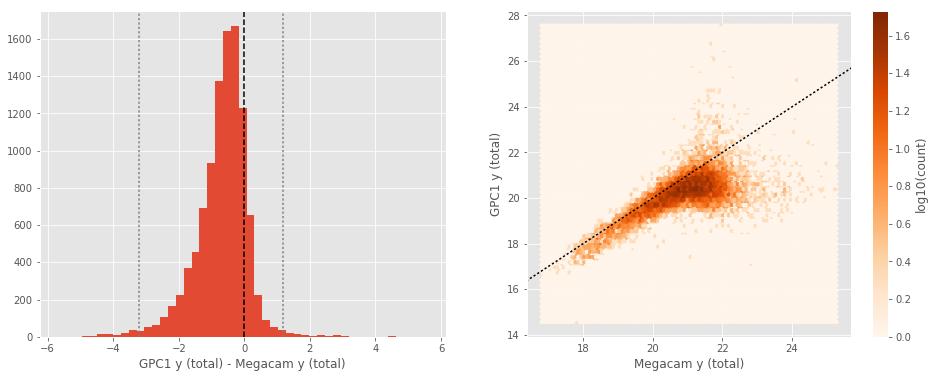

In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        # RCS has no aperture magnitudes
        if ('megacam_i' not in basecol1 
            and 'megacam_i' not in basecol2 
            and 'megacam_y' not in basecol1
            and'megacam_y' not in basecol1):
            col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
            nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                            labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [12]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_Lockman-SWIRE.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

WFC u (aperture) - SDSS u (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.18
- 1% percentile: -1.5710824012756348
- 99% percentile: 0.7945964813232422


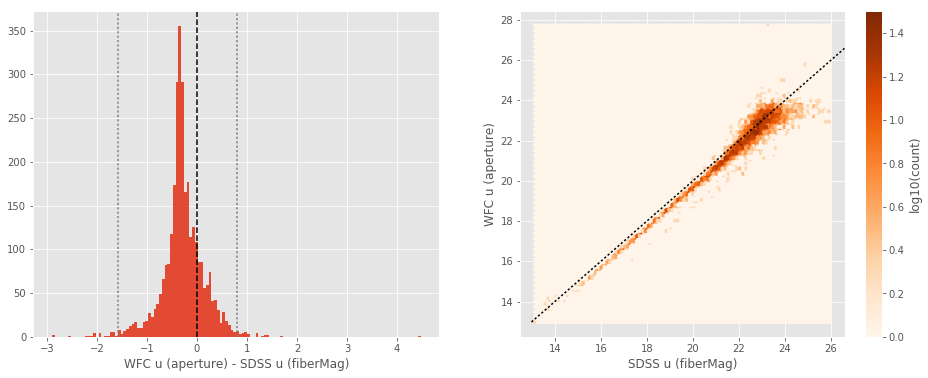

WFC u (total) - SDSS u (petroMag):
- Median: 0.07
- Median Absolute Deviation: 0.36
- 1% percentile: -3.809451866149902
- 99% percentile: 1.9933301925659166


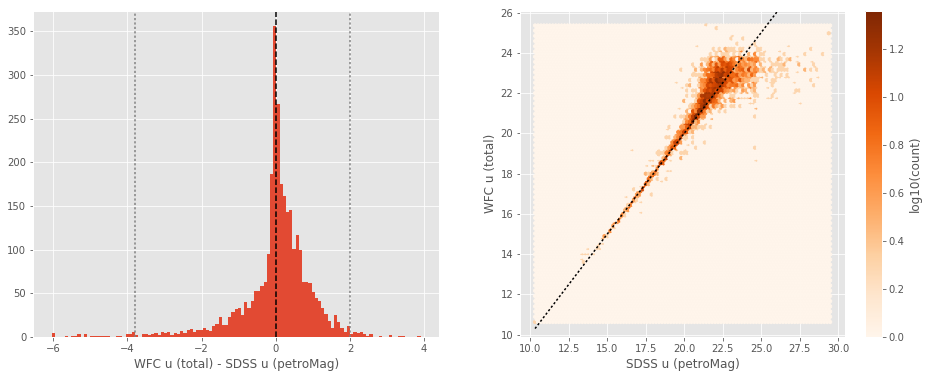

Megacam u (aperture) - SDSS u (fiberMag):
- Median: 0.01
- Median Absolute Deviation: 0.52
- 1% percentile: -1.7239515686035158
- 99% percentile: 3.037174682617188


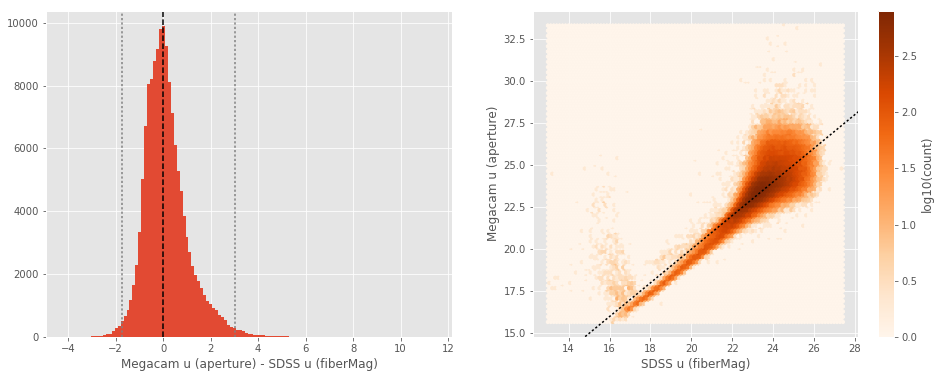

Megacam u (total) - SDSS u (petroMag):
- Median: 0.09
- Median Absolute Deviation: 0.83
- 1% percentile: -4.138626194000244
- 99% percentile: 4.583783168792724


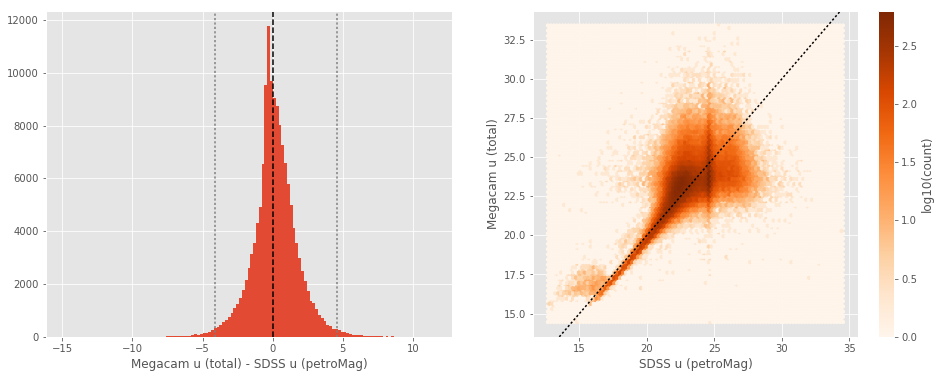

WFC g (aperture) - SDSS g (fiberMag):
- Median: -0.45
- Median Absolute Deviation: 0.12
- 1% percentile: -1.153176498413086
- 99% percentile: 0.4261890411376952


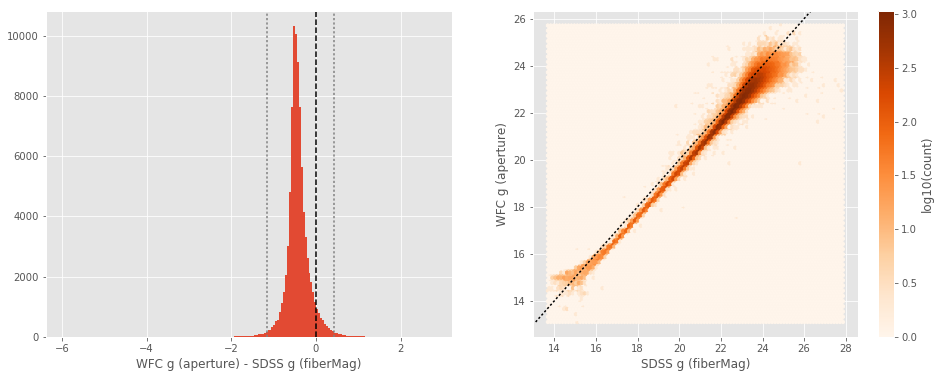

WFC g (total) - SDSS g (petroMag):
- Median: -0.08
- Median Absolute Deviation: 0.23
- 1% percentile: -3.3376033782958983
- 99% percentile: 1.32151603698731


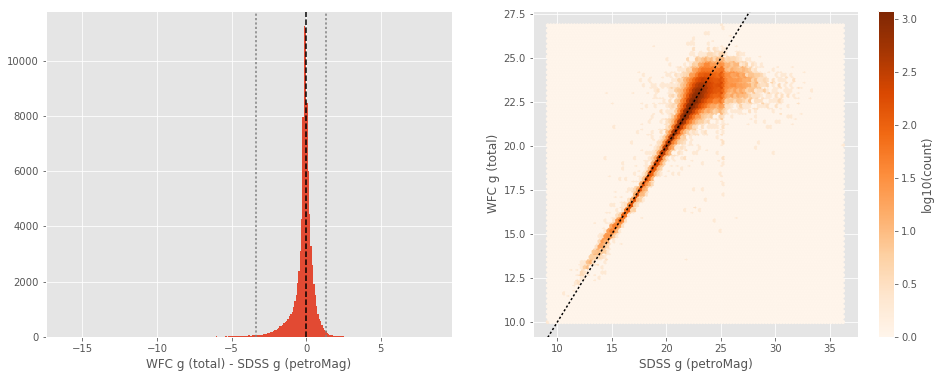

Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.18
- 1% percentile: -1.0998111724853517
- 99% percentile: 1.262142181396477


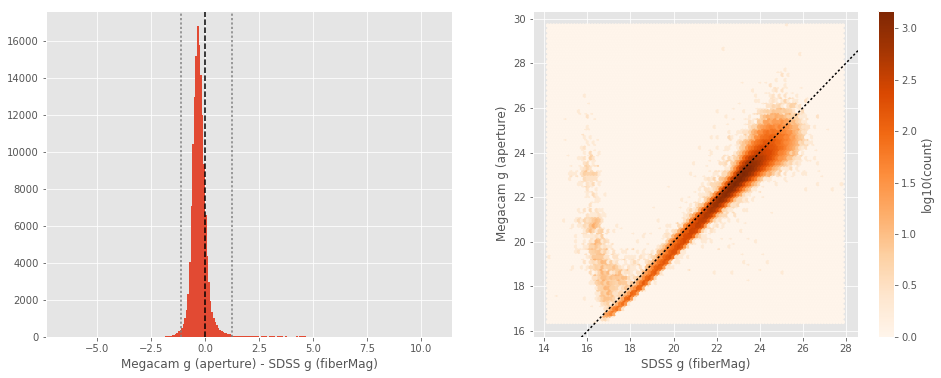

Megacam g (total) - SDSS g (petroMag):
- Median: -0.15
- Median Absolute Deviation: 0.26
- 1% percentile: -3.540327453613281
- 99% percentile: 2.118810653686525


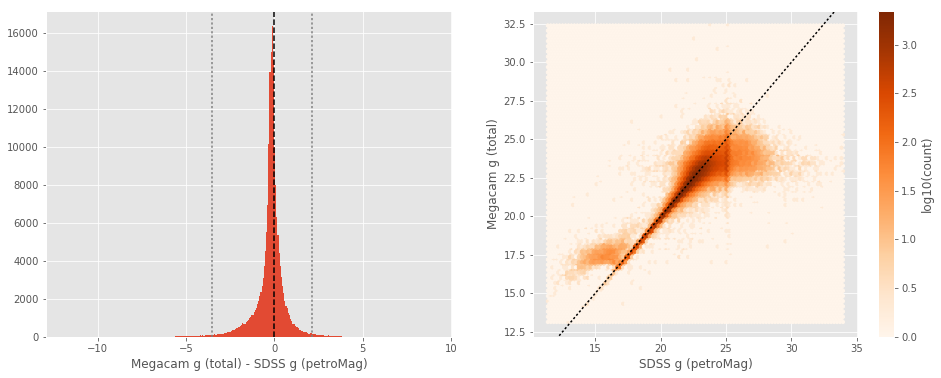

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.56
- Median Absolute Deviation: 0.26
- 1% percentile: -2.496891307830811
- 99% percentile: 1.7368188095092725


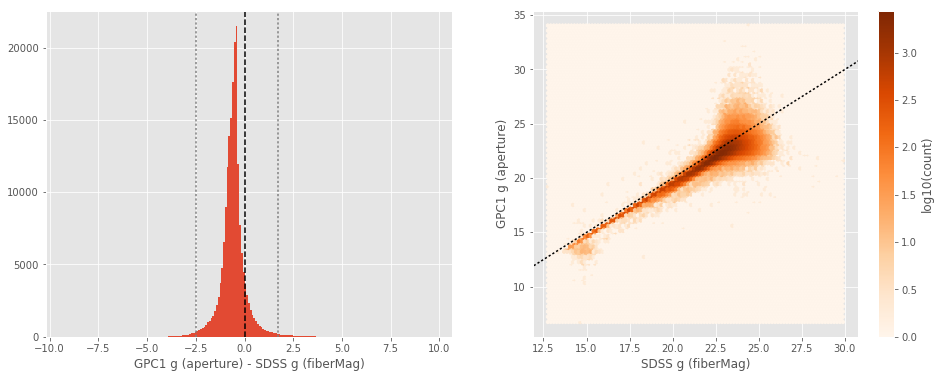

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.10
- Median Absolute Deviation: 0.27
- 1% percentile: -4.111917877197266
- 99% percentile: 1.7278203964233376


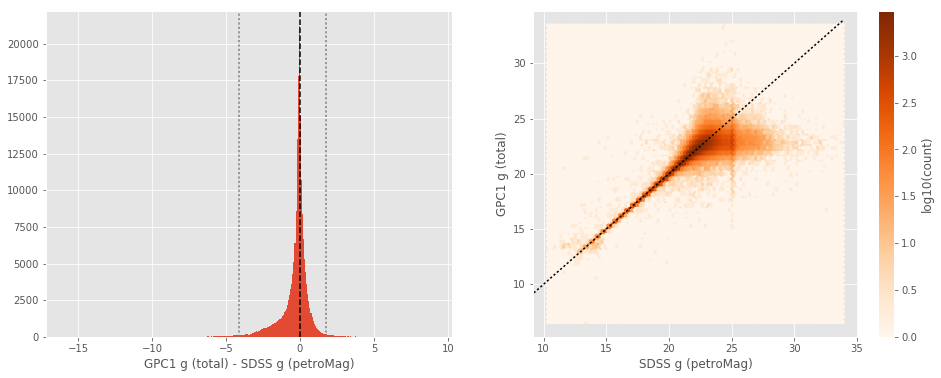

WFC r (aperture) - SDSS r (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.07
- 1% percentile: -0.9245659255981445
- 99% percentile: 0.3214846229553226


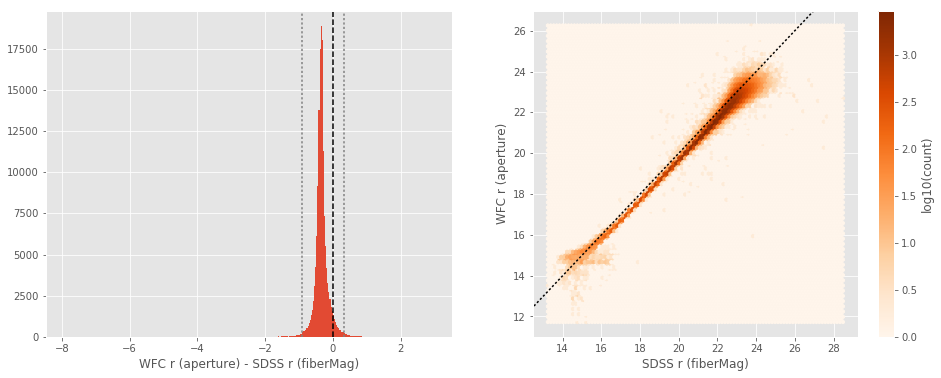

WFC r (total) - SDSS r (petroMag):
- Median: 0.04
- Median Absolute Deviation: 0.15
- 1% percentile: -2.676791229248047
- 99% percentile: 1.1676996612548833


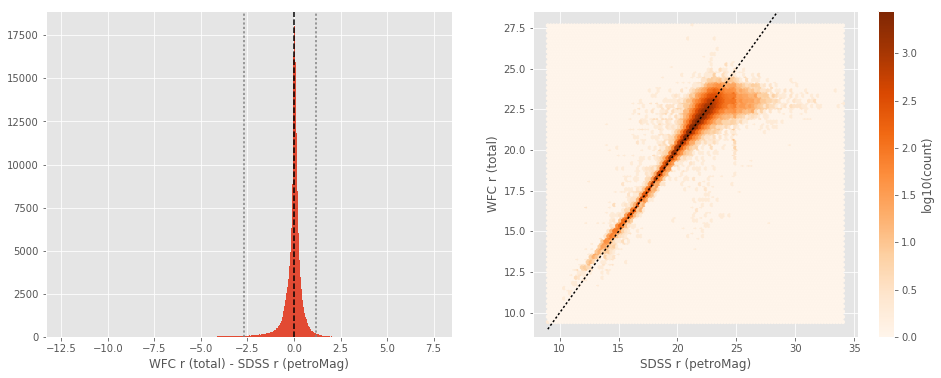

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less


Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.21
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8575413894653321
- 99% percentile: 2.322139625549326


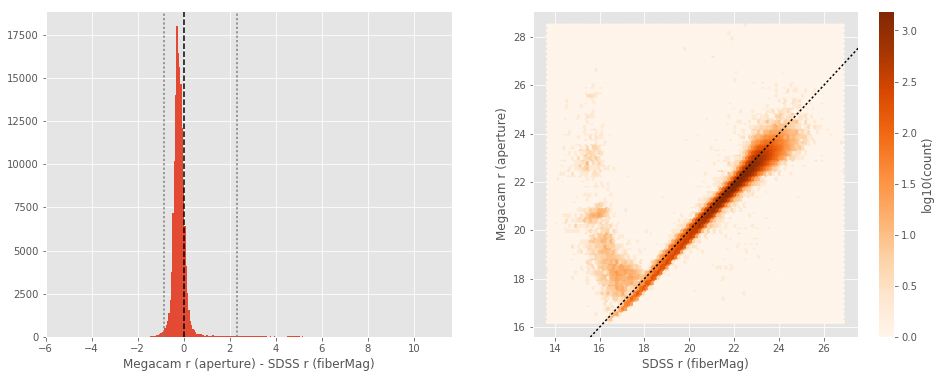

Megacam r (total) - SDSS r (petroMag):
- Median: -0.06
- Median Absolute Deviation: 0.15
- 1% percentile: -2.867800807952881
- 99% percentile: 1.969779825210568


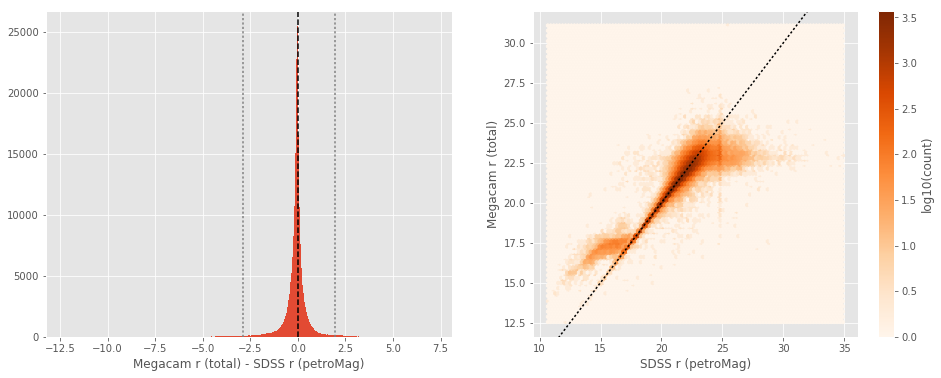

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.14
- 1% percentile: -1.5779515075683594
- 99% percentile: 0.6068578338623037


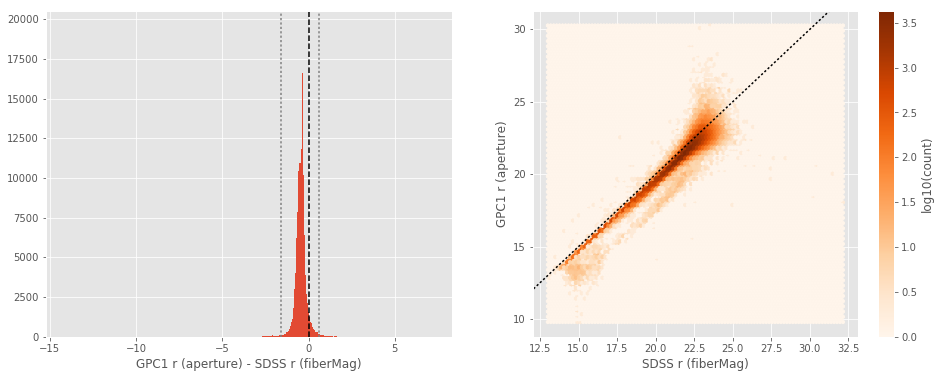

GPC1 r (total) - SDSS r (petroMag):
- Median: 0.04
- Median Absolute Deviation: 0.14
- 1% percentile: -2.5192892456054685
- 99% percentile: 1.1319837570190423


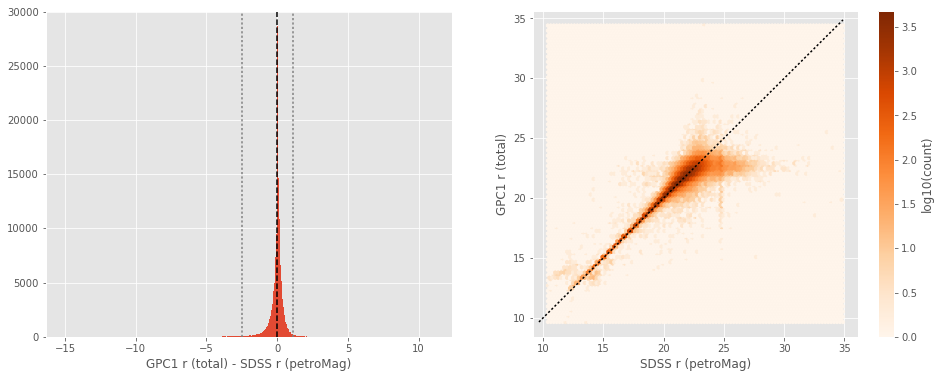

WFC i (aperture) - SDSS i (fiberMag):
- Median: -0.41
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9962218856811523
- 99% percentile: 0.35475969314575084


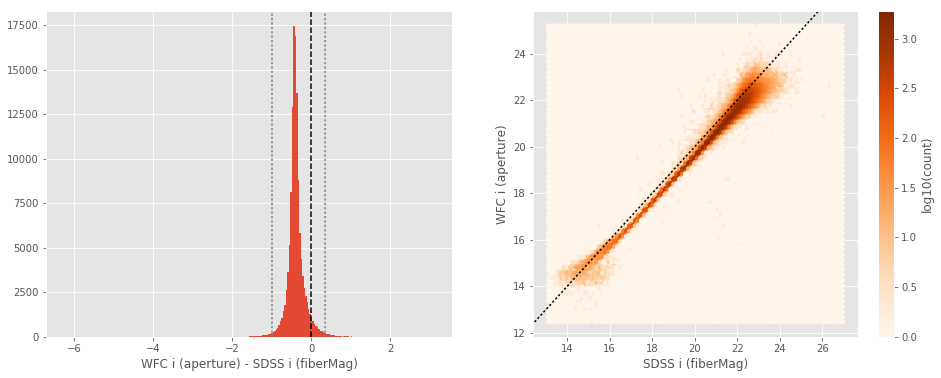

WFC i (total) - SDSS i (petroMag):
- Median: -0.02
- Median Absolute Deviation: 0.18
- 1% percentile: -3.216203365325928
- 99% percentile: 1.130485744476317


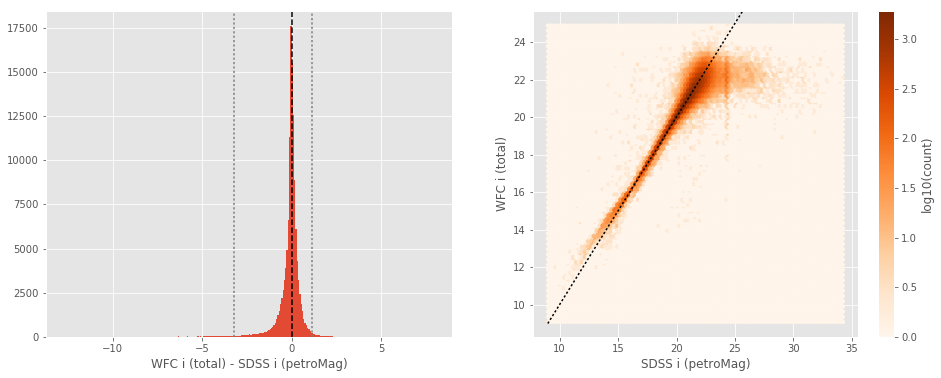

Megacam i (total) - SDSS i (petroMag):
- Median: -0.13
- Median Absolute Deviation: 0.17
- 1% percentile: -3.6602382850646973
- 99% percentile: 1.091551609039307


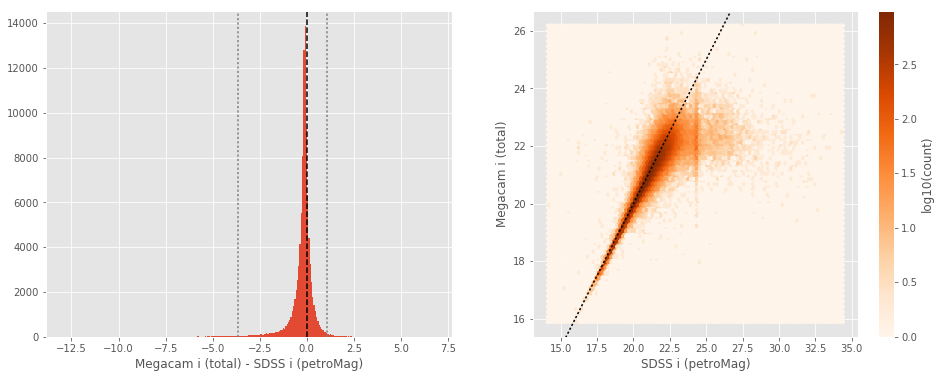

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.41
- Median Absolute Deviation: 0.12
- 1% percentile: -1.1483927154541016
- 99% percentile: 0.3729707336425758


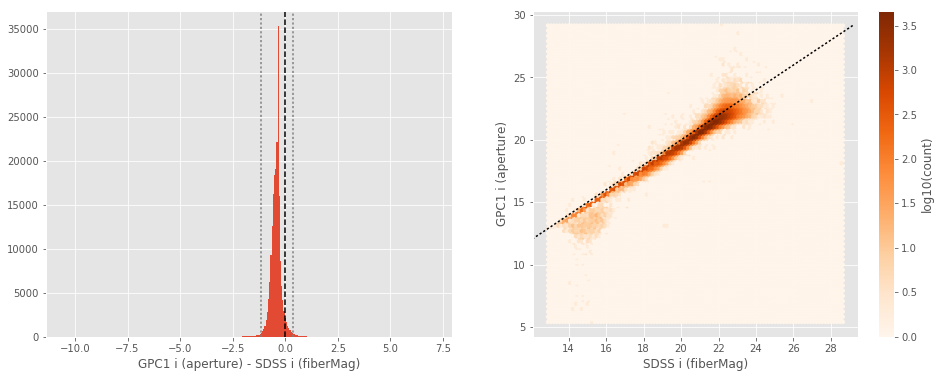

GPC1 i (total) - SDSS i (petroMag):
- Median: 0.05
- Median Absolute Deviation: 0.13
- 1% percentile: -2.7237721443176266
- 99% percentile: 0.9462432289123528


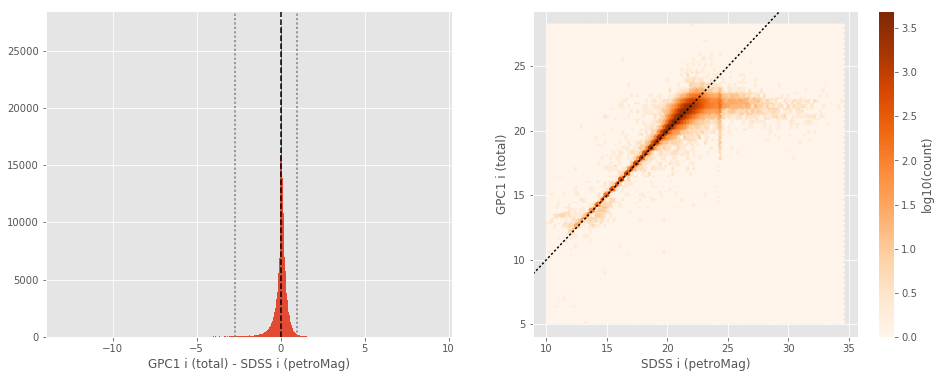

WFC z (aperture) - SDSS z (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.12
- 1% percentile: -1.2592236328125
- 99% percentile: 0.6335509490966799


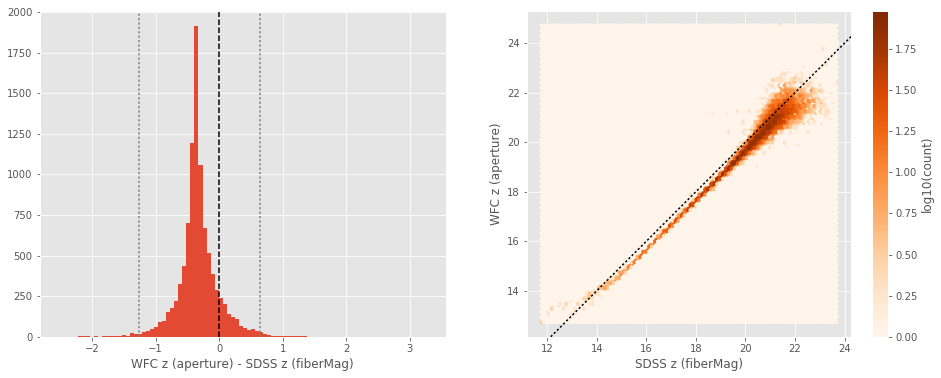

WFC z (total) - SDSS z (petroMag):
- Median: 0.00
- Median Absolute Deviation: 0.30
- 1% percentile: -4.017242908477783
- 99% percentile: 1.5223383903503418


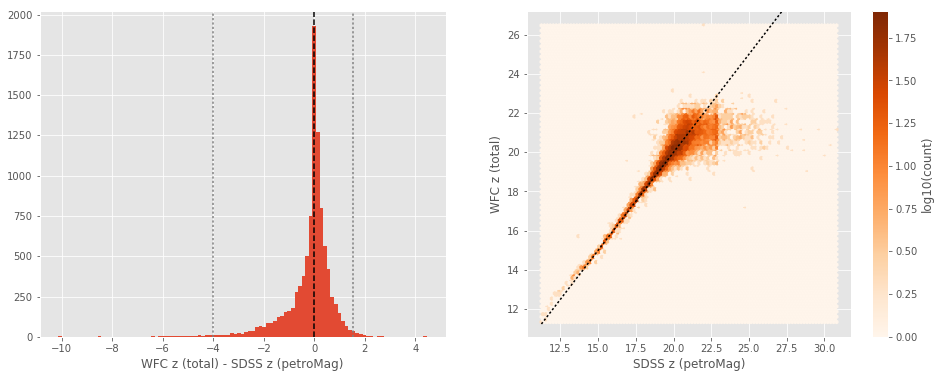

Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.14
- Median Absolute Deviation: 0.20
- 1% percentile: -1.1127138900756837
- 99% percentile: 2.7650779533386163


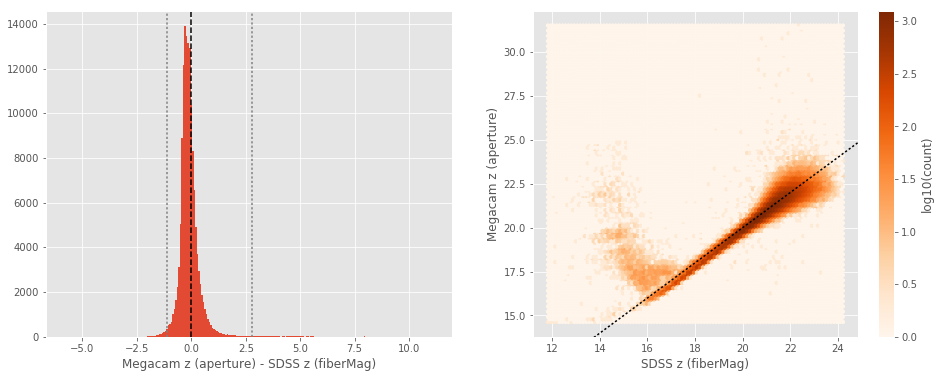

Megacam z (total) - SDSS z (petroMag):
- Median: -0.02
- Median Absolute Deviation: 0.37
- 1% percentile: -3.9964558029174806
- 99% percentile: 2.1697754859924325


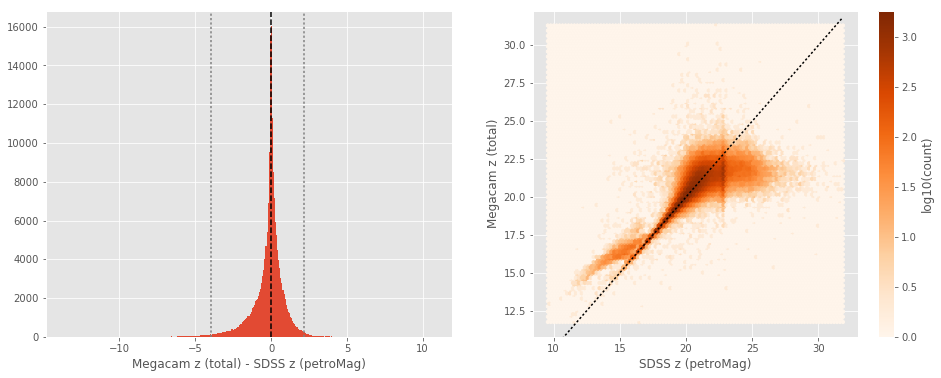

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.32
- Median Absolute Deviation: 0.17
- 1% percentile: -1.417550163269043
- 99% percentile: 1.0491362571716336


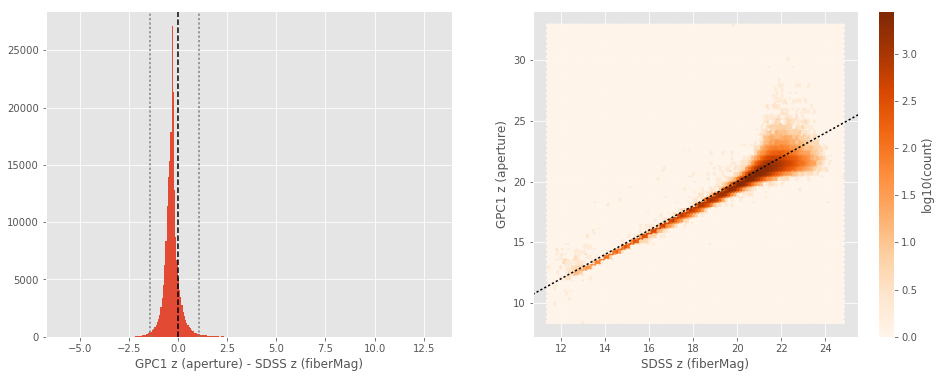

GPC1 z (total) - SDSS z (petroMag):
- Median: 0.11
- Median Absolute Deviation: 0.29
- 1% percentile: -3.821057033538818
- 99% percentile: 1.7081263542175282


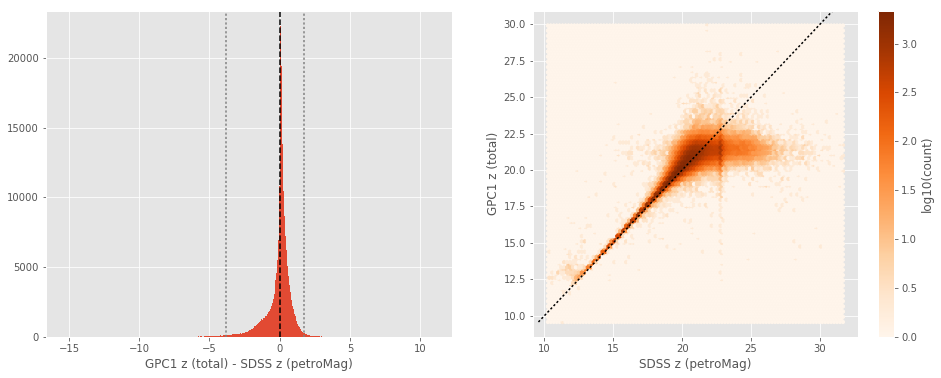

In [13]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap_colname = "fiberMag_{}".format(band[-1])
        sdss_mag_tot_colname = "petroMag_{}".format(band[-1])
        master_cat_mag_ap_colname = "m_ap_{}".format(band.replace(" ", "_").lower())
        master_cat_mag_tot_colname = "m_{}".format(band.replace(" ", "_").lower())
        
        # Set SDSS magnitudes to NaN when the magnitude  is negative as SDSS uses large
        # negative numbers for missing magnitudes
        sdss[sdss_mag_ap_colname][sdss[sdss_mag_ap_colname] < 0.] = np.nan
        sdss[sdss_mag_tot_colname][sdss[sdss_mag_tot_colname] < 0.] = np.nan
  
        if not 'megacam_i' in master_cat_mag_ap_colname:
            sdss_mag_ap = sdss[sdss_mag_ap_colname]
            master_cat_mag_ap = master_catalogue[master_cat_mag_ap_colname][ml_sdss_idx]
    
            nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                            labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss[sdss_mag_tot_colname]
        master_cat_mag_tot = master_catalogue[master_cat_mag_tot_colname][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_tot, master_cat_mag_tot,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [14]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [15]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_Lockman-SWIRE.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

WFCAM J (total) - 2MASS J:
- Median: 0.02
- Median Absolute Deviation: 0.05
- 1% percentile: -0.9130657836820437
- 99% percentile: 0.575751805124098


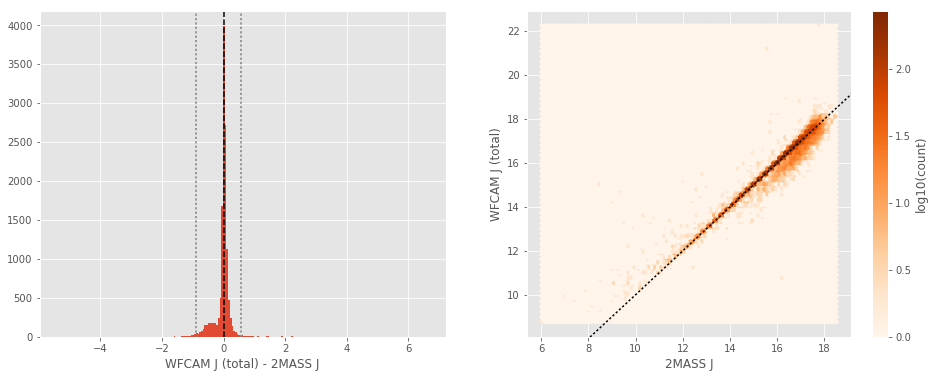

In [16]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_wfcam_j'][ml_twomass_idx],
                labels=("2MASS J", "WFCAM J (total)"))

WFCAM Ks-like (total) - 2MASS Ks:
- Median: 0.07
- Median Absolute Deviation: 0.08
- 1% percentile: -0.8240238957842398
- 99% percentile: 0.9100533730451055


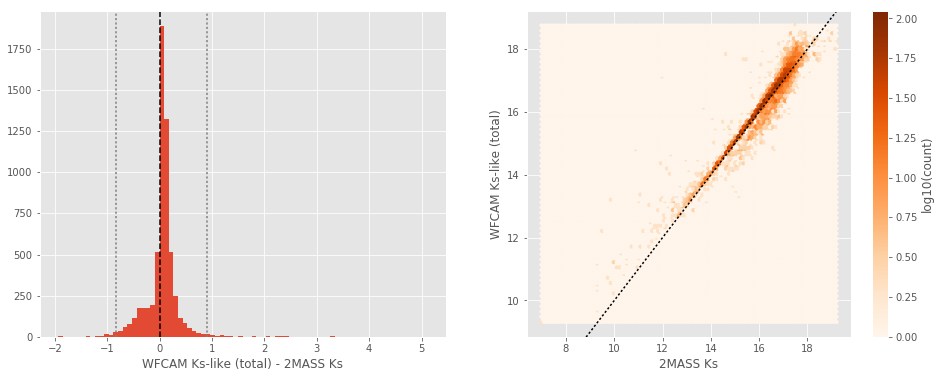

In [17]:
wfcam_ks_like = master_catalogue['m_wfcam_k'] + 0.003 + 0.004 * (
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, wfcam_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "WFCAM Ks-like (total)"))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [18]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 2456999 / 4366298 (56.27%)


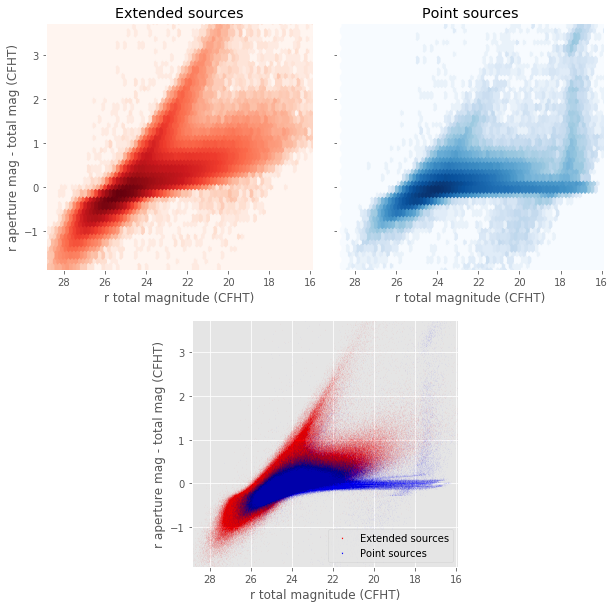

In [19]:
nb_ccplots(
    master_catalogue['m_megacam_r'],
    master_catalogue['m_ap_megacam_r'] - master_catalogue['m_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 85805 / 4366298 (1.97%)


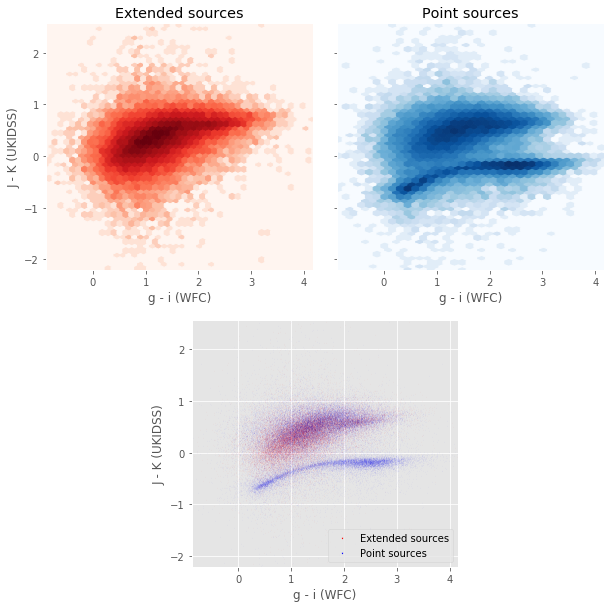

In [20]:
nb_ccplots(
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'],
    "g - i (WFC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 129379 / 4366298 (2.96%)


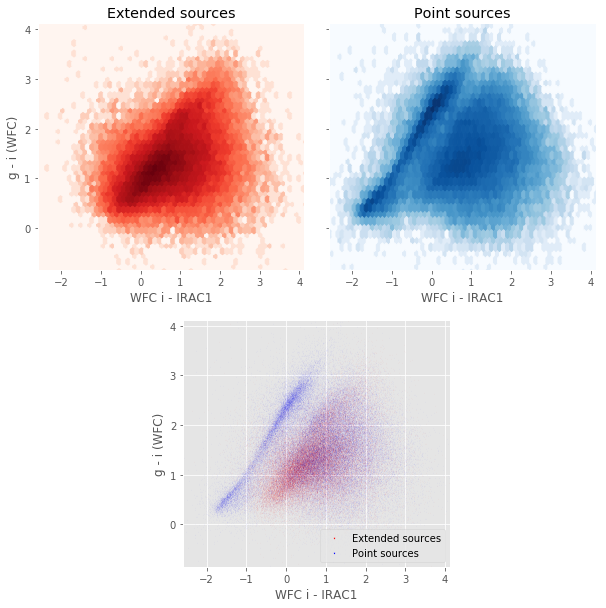

In [21]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 2072647 / 4366298 (47.47%)


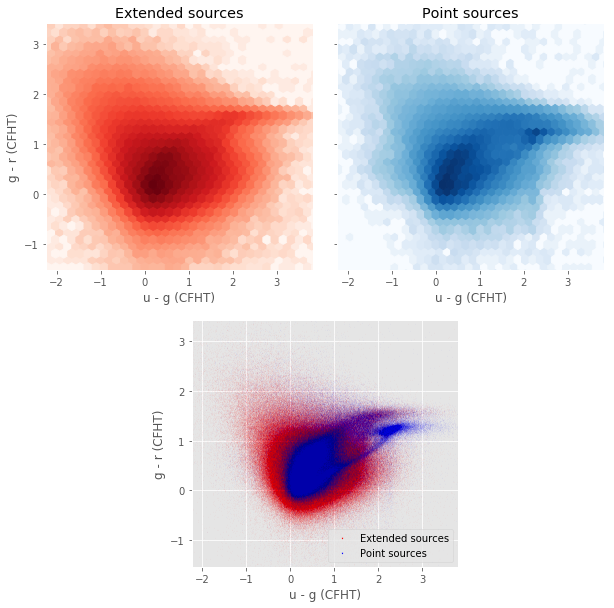

In [22]:
nb_ccplots(
    master_catalogue['m_megacam_u'] - master_catalogue['m_megacam_g'],
    master_catalogue['m_megacam_g'] - master_catalogue['m_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 108739 / 4366298 (2.49%)


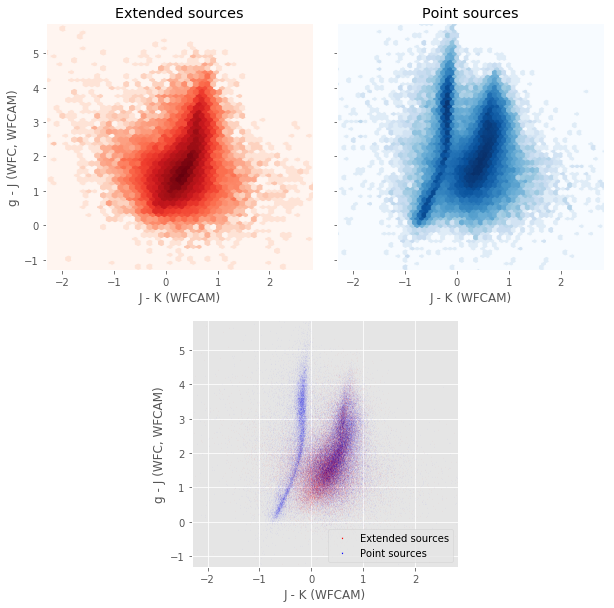

In [23]:
nb_ccplots(
    master_catalogue['m_wfcam_j'] - master_catalogue['m_wfcam_k'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfcam_j'],
    "J - K (WFCAM)", "g - J (WFC, WFCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 107975 / 4366298 (2.47%)


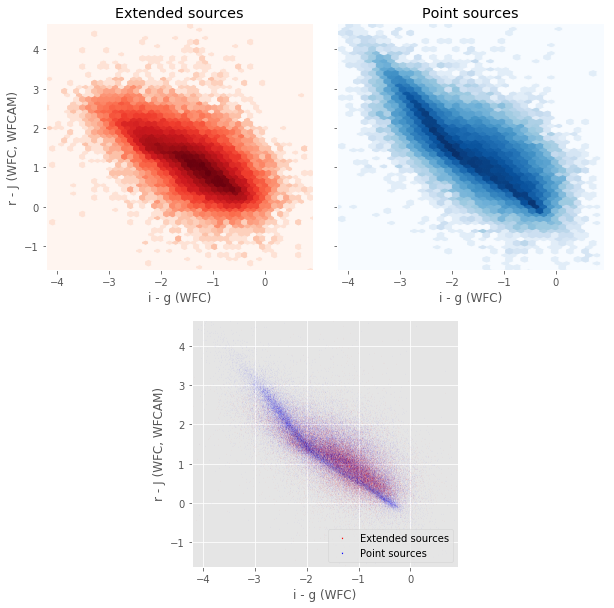

In [24]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_wfc_g'],
    master_catalogue['m_wfc_r'] - master_catalogue['m_wfcam_j'],
    "i - g (WFC)", "r - J (WFC, WFCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 38805 / 4366298 (0.89%)


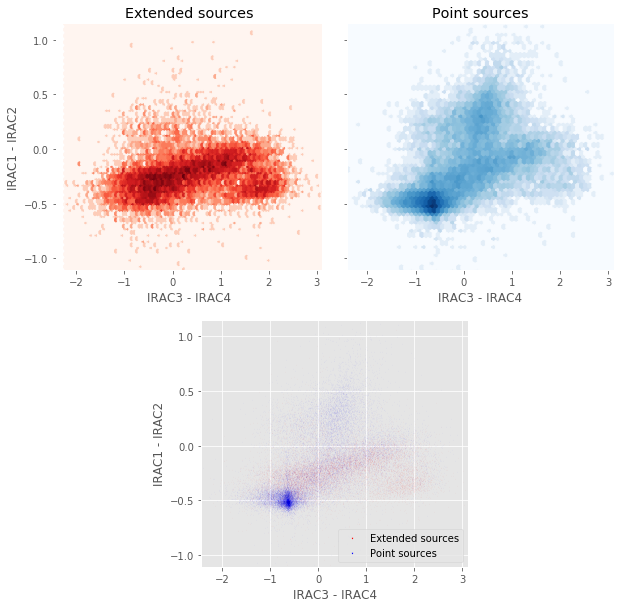

In [25]:
nb_ccplots(
    master_catalogue['m_irac_i3'] - master_catalogue['m_irac_i4'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)